<a href="https://colab.research.google.com/github/YounseoKim62/Prediction-of-Homicides-in-Urban-Centers-A-Machine-Learning-Approach/blob/master/Notebook_Pred2Town_XAI_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pred2Town - Version 1.1 - Git**

Note: The analyzes presented here are part of the research entitled "Prediction of Homicides in Urban Centers: A Machine Learning Approach", published in IntelliSys 2021. Git link: https://github.com/josesousaribeiro/Pred2Town.

All the code components below, can be executed for a better understanding of the processes carried out in that research.

# **Analyzes**

## - Libs:

In [1]:
!pip install shap
!pip install lime
!pip install venn
!pip install scikit_posthocs
!pip install catboost
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=848836283cabf030cbbb3e17eef973e6210f14b690c0da8d86d5d5e4433744c4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
  Preparing metadata (setup.py) ... done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19702 sha256=f9b25c6a5824444e8f8e67e0ed6baa55416d6ebc19cb2e44d81c7ef1874d9909
  Stored in directory: /root/.cache/pip/wheels/9c/ce/43/705b4a04cd822891d1d7a4c43fc444b4798978e72c79528c5f
Successfully built venn
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

In [3]:
from scipy.stats import friedmanchisquare
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from folium.features import DivIcon

from decimal import Decimal


from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import subplots
#from venn import venn # venn has been overwritten,  Commenting out for now
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt
import shap
# deprecate if_delegate_has_method and replace with available_if
# from sklearn.feature_selection._from_model import _estimator_has
# @available_if(_estimator_has('wrapped_estimator_'))
import eli5
import lime
import lime.lime_tabular
import pandas as pd
import csv
import io
import numpy as np
import seaborn as sns; sns.set()
import scikit_posthocs as sp
import pickle
import pandas as pd
import folium

import math
import matplotlib.pyplot as plt

import lightgbm as lgb
import catboost as cb

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Mounted at /content/drive


## Global params to execution:

In [4]:
name_dataset = 'dataset_pred2town_bel.csv'
name_target_class = 'Class'

dt = {'info_gain_ent':[],
        'feat_imp_oob':[],
        'shap_rf':[],
        'shap_xgb':[],
        'shap_gb':[],
        'shap_dt':[],
        'eli5_rf':[],
        'eli5_xgb':[],
        'eli5_gb':[],
        'eli5_dt':[]}

df_Pred2Town_feature_rank = pd.DataFrame(dt)


# If false, upload the templates to the google colab path in order to locate each model to be reused.
# If true, grid search will be performed and new best models will be located automatically.
run_grid_search_cb = False
run_grid_search_lgbm = True
run_grid_search_rf = True
run_grid_search_xgb = True
run_grid_search_gb = True
run_grid_search_lr = False
run_grid_search_dt = True
run_grid_search_knn = True
run_grid_search_nb = True
run_grid_search_nn = False
run_grid_search_svm = True


cv_grid_search = 7
crossvalidation = 7



## - Import dataset: dataset_pred2town_bel.csv


In [ ]:
#please upload file dataset_pred2town_bel.csv
print("Note: upload file dataset_pred2town_bel.csv")
uploaded1 = files.upload()
df = pd.read_csv(io.BytesIO(uploaded1[name_dataset]), encoding="UTF-8", sep=";")

Note: upload file dataset_pred2town_bel.csv


Saving dataset_pred2town_bel.csv to dataset_pred2town_bel.csv


In [ ]:
df

,mes_num_crb,quant_lesao_corporal_crb,quant_ameaca_crb,quant_roubo_crb,quant_injuria_crb,quant_furto_crb,quant_lesao_no_transito_crb,quant_dano_no_transito_crb,quant_difamacao_crb,quant_homicidio_crb,...,quant_receptacao_crb,quant_estupro_crb,quant_desaparecimento_de_pessoa_crb,quant_tentativa_de_homicidio_crb,quant_poluicao_sonora_crb,quant_outras_fraudes_crb,quant_desobediencia_crb,quant_desacato_crb,quant_perturbacoes_da_tranquilidade_crb,Class
0,1.0,0.000000,0.048193,0.002433,0.00000,0.020619,0.000000,0.000000,0.000000,0.071429,...,0.166667,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0
1,1.0,0.081633,0.084337,0.124088,0.03125,0.036082,0.233333,0.000000,0.000000,0.071429,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,1
2,1.0,0.000000,0.132530,0.063260,0.03125,0.018041,0.066667,0.027027,0.000000,0.000000,...,0.000000,0.0,0.2,0.0,0.000000,0.0,0.166667,0.0,0.125,1
3,1.0,0.183673,0.168675,0.141119,0.06250,0.126289,0.100000,0.027027,0.000000,0.000000,...,0.000000,0.0,0.4,0.0,0.000000,0.0,0.166667,0.4,0.125,0
4,1.0,0.040816,0.012048,0.017032,0.00000,0.038660,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.2,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,12.0,0.306122,0.289157,0.141119,0.15625,0.118557,0.100000,0.060811,0.166667,0.071429,...,0.000000,0.0,0.2,0.2,0.000000,0.0,0.000000,0.0,0.000,0
2000,12.0,0.183673,0.277108,0.192214,0.28125,0.381443,0.366667,0.506757,0.222222,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.000,0
2001,12.0,0.040816,0.012048,0.043796,0.00000,0.015464,0.000000,0.047297,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0
2002,12.0,0.040816,0.060241,0.075426,0.06250,0.090206,0.066667,0.243243,0.166667,0.071429,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0



## - Split de Train/Test

In [ ]:
np.random.seed(0)
# Set target value and others features.
y_feature_name = name_target_class

Y = (df[y_feature_name].astype(int))

x_features_names = list(df.head(0))
x_features_names.remove(name_target_class)
X =  df[x_features_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) # 70% training and 30% tes




In [ ]:
X_train.to_csv("X_train.csv")
files.download("X_train.csv")

X_test.to_csv("X_test.csv")
files.download("X_test.csv")

y_train.to_csv("y_train.csv")
files.download("y_train.csv")

y_test.to_csv("y_test.csv")
files.download("y_test.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Class stratification

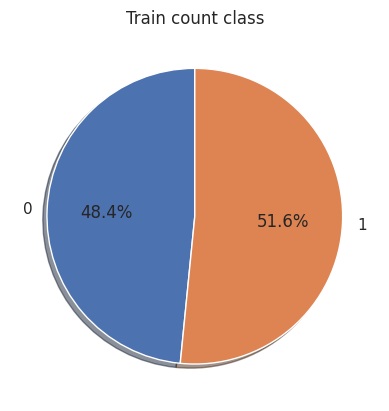

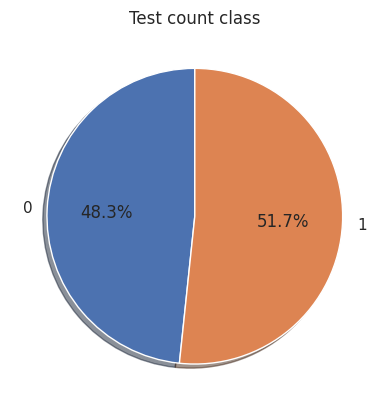

In [ ]:

title = 'Train count class'
labels = [0,1]
sizesTrain = [y_train.to_list().count(0), y_train.to_list().count(1)]
fig1, ax1 = plt.subplots()
ax1.pie(sizesTrain, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(title)
plt.show()

title = 'Test count class'
labels = [0,1]
sizesTest = [y_test.to_list().count(0), y_test.to_list().count(1)]
fig1, ax1 = plt.subplots()
ax1.pie(sizesTest, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(title)
plt.show()

In [ ]:
print(df[y_feature_name].to_list().count(0))
print(df[y_feature_name].to_list().count(1))

970
1034


## - Train, test and algorithm analysis

### LightGBM - Create a GridSearch to identify the best classify

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_lgbm.sav'

if run_grid_search_lgbm == True:
  # Create the parameter grid
  # https://lightgbm.readthedocs.io/en/latest/Parameters.html
  param_grid = {'learning_rate': [0.1, 0.5]}

  model_lgbm = lgb.LGBMClassifier(objective='binary',
                                  learning_rate = 0.1,
                                  max_depth = 1,
                                  bootstrap = True,
                                  n_estimators = 100,
                                  min_data_in_leaf = 40,
                                  boosting_type = 'goss')

  grid_search = GridSearchCV(estimator=model_lgbm,
                             param_grid=param_grid,
                             cv=StratifiedKFold(cv_grid_search),
                             n_jobs = 3, verbose = 2,
                             scoring = 'roc_auc')


  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_lgbm = grid_search.best_estimator_

  #save
  pickle.dump(model_lgbm, open(filename, 'wb'))
  files.download(filename)
else:
  model_lgbm = pickle.load(open(filename, 'rb'))
  model_lgbm.fit(X_train, y_train)

print('Parameters of best model:')
print(model_lgbm)
y_pred_lgbm = model_lgbm.predict(X_test)

Fitting 7 folds for each of 2 candidates, totalling 14 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 723, number of negative: 679
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parameters of best model:
LGBMClassifier(boosting_type='goss', bootstrap=True, max_depth=1,
               min_data_in_leaf=40, objective='binary')
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


LGBM - Accuracy, precision and Recall.

In [ ]:
y_pred = y_pred_lgbm
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.750831,0.769231,0.73955


LGBM - Confusion matrix

[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


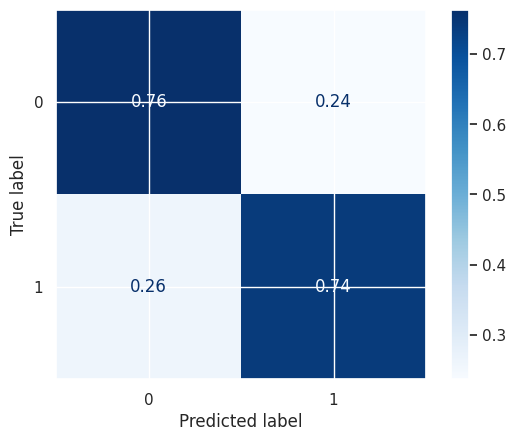

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_lgbm, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

**LGBM** - Statistical analisys

[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 619, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

<ipython-input-122-373f476a539e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


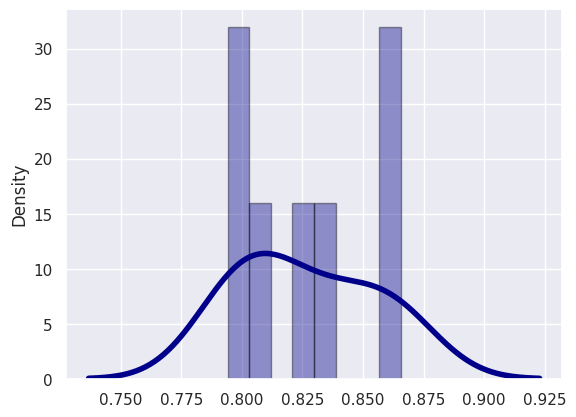

In [ ]:
#del dataframe_analisys
hit_rates = cross_val_score(model_lgbm, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_lgbm = hit_rates

### CatBoost - Create a GridSearch to identify the best classify

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_cb.sav'

if run_grid_search_cb == True:
 #parameters
 #https://catboost.ai/docs/concepts/parameter-tuning.html
  param_grid = {
            'learning_rate':[0.1, 0.5],
            'depth':[1, 6, 12],
            'iterations':[10, 100, 200],
            'grow_policy':['SymmetricTree','Depthwise','Lossguide'],
            'bagging_temperature': [0,0.5,1]
           }
  model_cb =  cb.CatBoostClassifier()

  grid_search = GridSearchCV(estimator=model_cb,
                             param_grid=param_grid,
                             cv=StratifiedKFold(cv_grid_search),
                             n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_cb = grid_search.best_estimator_
  #save
  pickle.dump(model_cb, open(filename, 'wb'))
  files.download(filename)
else:
  model_cb = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_cb)
y_pred_cb = model_cb.predict(X_test)

#Fitting 10 folds for each of 648 candidates, totalling 6480 fit

Parameters of best model:


CatBoost - Accuracy, precision and recall

In [ ]:
y_pred = y_pred_cb
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.737542,0.747573,0.742765


CatBoost - Confusion matrix

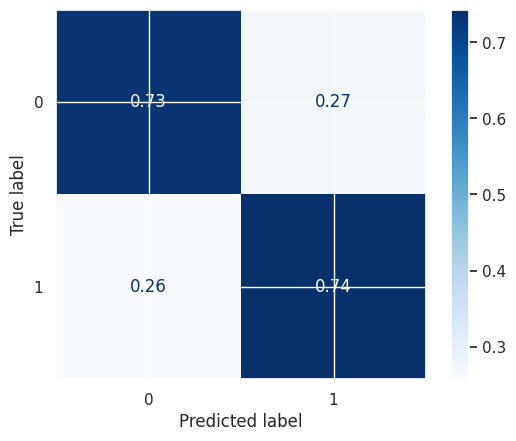

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_cb, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

CatBoost - Statistical analysis

0:	learn: 0.6478140	total: 136ms	remaining: 27s
1:	learn: 0.6055219	total: 247ms	remaining: 24.5s
2:	learn: 0.5713960	total: 353ms	remaining: 23.2s
3:	learn: 0.5464516	total: 491ms	remaining: 24.1s
4:	learn: 0.5173645	total: 675ms	remaining: 26.3s
5:	learn: 0.4977931	total: 831ms	remaining: 26.9s
6:	learn: 0.4762514	total: 1s	remaining: 27.7s
7:	learn: 0.4581320	total: 1.23s	remaining: 29.5s
8:	learn: 0.4426217	total: 1.42s	remaining: 30.1s
9:	learn: 0.4225274	total: 1.6s	remaining: 30.4s
10:	learn: 0.4106945	total: 1.78s	remaining: 30.6s
11:	learn: 0.3960795	total: 2s	remaining: 31.4s
12:	learn: 0.3826757	total: 2.23s	remaining: 32s
13:	learn: 0.3641446	total: 2.43s	remaining: 32.3s
14:	learn: 0.3540890	total: 2.61s	remaining: 32.2s
15:	learn: 0.3489639	total: 2.64s	remaining: 30.4s
16:	learn: 0.3365007	total: 2.81s	remaining: 30.3s
17:	learn: 0.3285430	total: 2.99s	remaining: 30.2s
18:	learn: 0.3170949	total: 3.16s	remaining: 30.1s
19:	learn: 0.3068983	total: 3.31s	remaining: 29.8s
2

<ipython-input-126-6a11108fd717>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


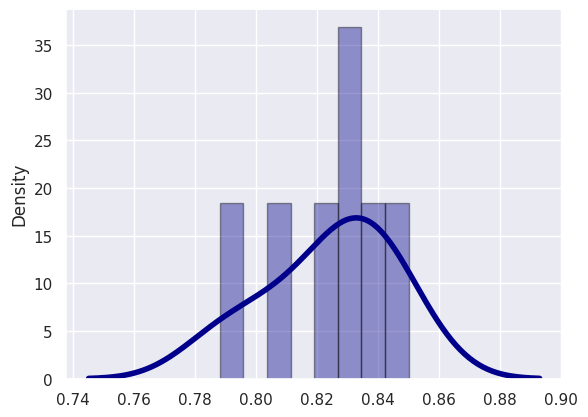

In [ ]:
#del dataframe_analisys
hit_rates = cross_val_score(model_cb, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_cb = hit_rates

### Random Forest - Create a GridSearch to identify the best classify

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_rf.sav'

if run_grid_search_rf == True:
  # Create the parameter grid based on the results of random search
  # parameters in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  param_grid = {}


  # Create a based model
  model_rf = RandomForestClassifier(max_depth = 12,
                                    bootstrap = True,
                                    n_estimators = 100,
                                    min_samples_leaf = 1,
                                    ccp_alpha = 0.0,
                                    criterion = 'gini',
                                    max_features = 'log2')
  # Instantiate the grid search model
  #https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
  grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid,
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')


  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)

  grid_search.best_params_

  model_rf = grid_search.best_estimator_
  #save
  pickle.dump(model_rf, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_rf = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_rf)
y_pred_rf = model_rf.predict(X_test)

#Fitting 10 folds for each of 864 candidates, totalling 8640 fits

Fitting 7 folds for each of 1 candidates, totalling 7 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parameters of best model:
RandomForestClassifier(max_depth=12, max_features='log2')


RF - Accuracy, precision and Recall

In [ ]:
y_pred = y_pred_rf
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.734219,0.739683,0.749196


RF - Confusio matrix

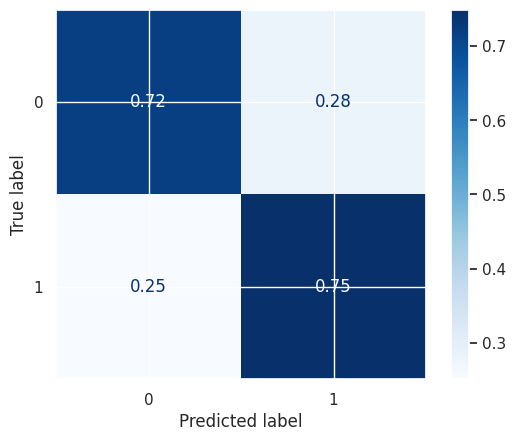

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

RF - Statistical analysis

<ipython-input-37-72c85e3d9022>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


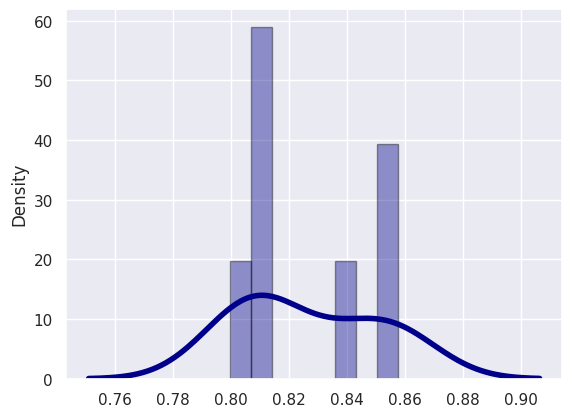

In [ ]:
hit_rates = cross_val_score(model_rf, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_rf = hit_rates

### XGBoot - Create a GridSearch to identify the best classify

In [ ]:
filename = 'best_model_xgb.sav'

if run_grid_search_xgb == True:
  # Create the parameter grid
  # parameters in https://xgboost.readthedocs.io/en/latest/parameter.html

  param_grid = {}
  # Create a based model
  model_xgb = XGBClassifier(max_depth = 1,
                            n_estimators = 200,
                            min_sample_leaf = 1,
                            booster = 'gbtree',
                            sampling_method = 'uniform',
                            tree_method = 'approx')
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_xgb, param_grid = param_grid,
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_


  model_xgb = grid_search.best_estimator_
  #save
  pickle.dump(model_xgb, open(filename, 'wb'))
  files.download(filename)
else:
  model_xgb = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_xgb)
y_pred_xgb = model_xgb.predict(X_test)



Fitting 7 folds for each of 1 candidates, totalling 7 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:27:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_sample_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parameters of best model:
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, min_sample_leaf=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


XGB - Accuracy, precision and recall

In [ ]:
y_pred = y_pred_xgb
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.750831,0.763934,0.749196


XGB - Confusion matrix

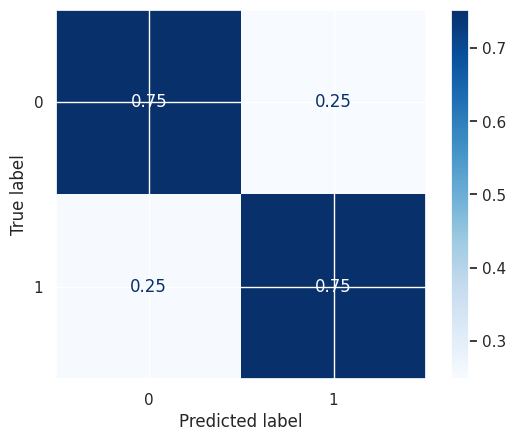

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

XGB - Statistical analysis

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:27:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_sample_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:27:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_sample_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_sample_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_sample_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:27:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_sample_leaf" } 

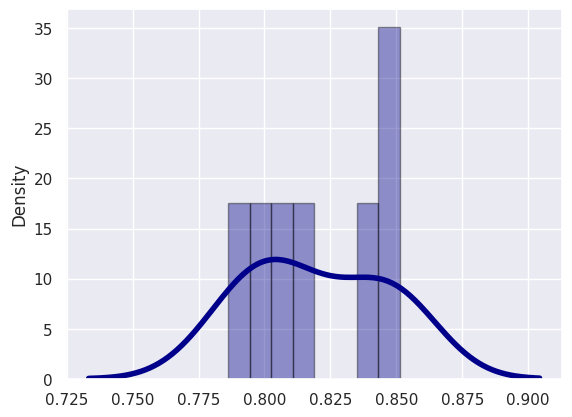

In [ ]:
#del dataframe_analisys
hit_rates = cross_val_score(model_xgb, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_xgb = hit_rates

### Gradiente Boosting

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_gb.sav'

if run_grid_search_gb == True:
  # Create the parameter grid
  # parameters in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
  param_grid = {'criterion':['friedman_mse', 'squared_error']}

  # Create a based model
  model_gb = GradientBoostingClassifier(max_depth = 12,
                                        n_estimators = 100,
                                        min_samples_leaf = 40,
                                        learning_rate = 0.1,
                                        loss = 'exponential',
                                        max_features = 'sqrt')

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_gb, param_grid = param_grid,
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')


  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_gb = grid_search.best_estimator_

  #save
  pickle.dump(model_gb, open(filename, 'wb'))
  files.download(filename)
else:
  model_gb = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_gb)
y_pred_gb = model_gb.predict(X_test)

#Fitting 10 folds for each of 972 candidates, totalling 9720 fits


Fitting 7 folds for each of 2 candidates, totalling 14 fits


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parameters of best model:
GradientBoostingClassifier(loss='exponential', max_depth=12,
                           max_features='sqrt', min_samples_leaf=40)


GB - Accuracy, precision and recall.

In [ ]:
y_pred = y_pred_gb
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.717608,0.726688,0.726688


GB - Confusion matrix

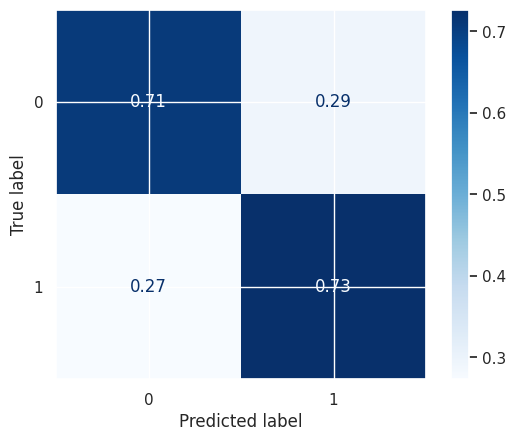

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_gb, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

GB - Statistical analysis

<ipython-input-63-b7562a407438>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


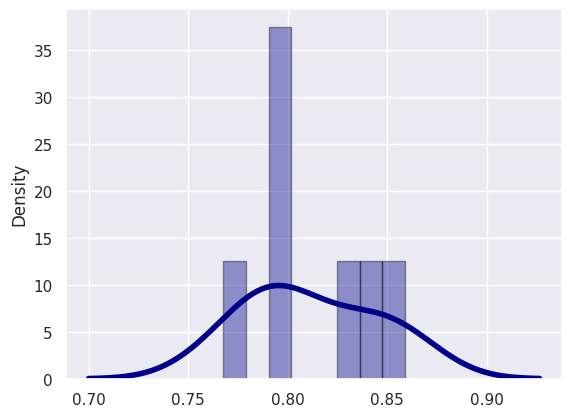

In [ ]:
hit_rates = cross_val_score(model_gb, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_gb = hit_rates

### Logistic Regression - Create a GridSearch to identify the best classify

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_lr.sav'

if run_grid_search_lr == True:
  # Create the parameter grid based on the results of random search

  param_grid = {
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'penalty': ['l1', 'l2'],
      'C':[0.001,0.008,0.05,0.09,0.1],
      'max_iter':[50, 200, 400, 500,600]}


  # Create a based model
  model_lr = LogisticRegression()
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_lr, param_grid = param_grid,
                            cv = StratifiedKFold(cv_grid_search),
                            n_jobs = 3,
                            verbose = 2,
                            scoring = 'roc_auc')


  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_lr = grid_search.best_estimator_
  #save
  pickle.dump(model_lr, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_lr = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_lr)
y_pred_lr = model_lr.predict(X_test)
#Fitting 10 folds for each of 112 candidates, totalling 1120 fits

Parameters of best model:
LogisticRegression(C=0.1, max_iter=50, solver='sag')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


LR - Accuracy, precision and recall

In [ ]:
y_pred = y_pred_lr
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.742525,0.8,0.66881


LR - Confusion matrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


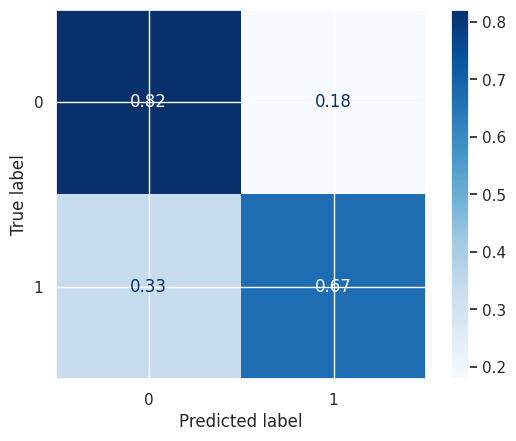

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

RL - Statistical analysis

<ipython-input-68-45aabff3ddec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


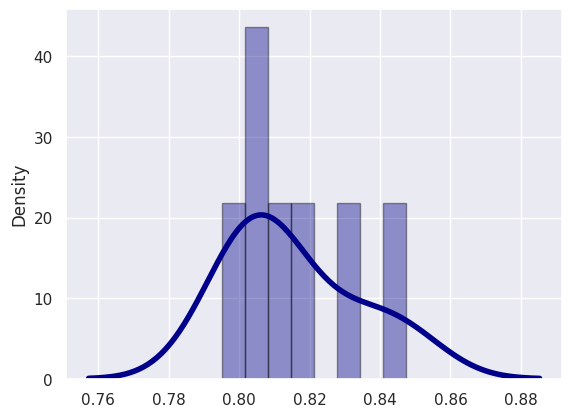

In [ ]:
hit_rates = cross_val_score(model_lr, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_lr = hit_rates

### Decision Tree

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_dt.sav'

if run_grid_search_dt == True:
  # Create the parameter grid
  # parameters in https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

  param_grid = {'max_depth': [1, 6, 12]}

  # Create a based model
  model_dt = DecisionTreeClassifier(min_samples_leaf = 40,
                                    criterion = 'entropy',
                                    splitter = 'random',
                                    min_samples_split = 2)

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_dt, param_grid = param_grid,
                            cv = StratifiedKFold(cv_grid_search), n_jobs = -1, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_dt = grid_search.best_estimator_
  #save
  pickle.dump(model_dt, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_dt = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_dt)
y_pred_dt = model_dt.predict(X_test)

#Fitting 10 folds for each of 800 candidates, totalling 8000 fits

Fitting 7 folds for each of 3 candidates, totalling 21 fits


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parameters of best model:
DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=40,
                       splitter='random')


DT - Accuracy, precision and recall

In [ ]:
y_pred = y_pred_dt
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.710963,0.712074,0.73955


DT - Confusion matrix

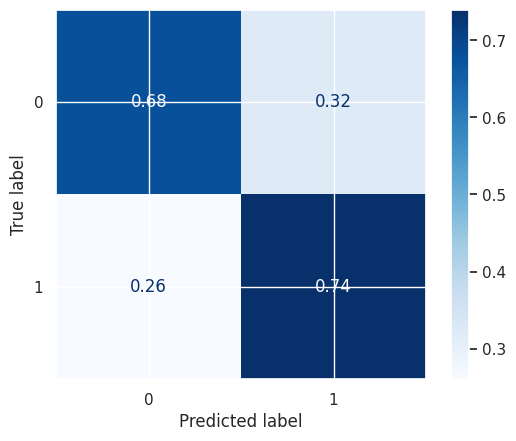

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

DT - Statistical analysis

<ipython-input-79-f1a4c931712f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


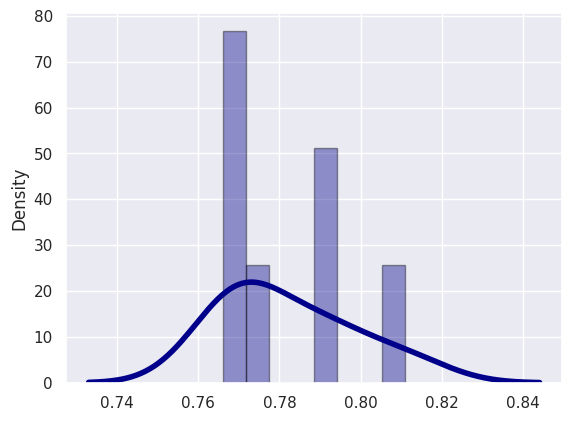

In [ ]:
hit_rates = cross_val_score(model_dt, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_dt = hit_rates

### KNN

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_knn.sav'

if run_grid_search_knn == True:
  # Create the parameter grid


  param_grid = {}

  # Create a based model
  model_knn = KNeighborsClassifier(leaf_size = 1,
                                   algorithm = 'ball_tree',
                                   metric = 'minkowski',
                                   n_neighbors = 8)

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_knn, param_grid = param_grid,
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_knn = grid_search.best_estimator_
  #save
  pickle.dump(model_knn, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_knn = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_knn)
y_pred_knn = model_knn.predict(X_test)

#Fitting 10 folds for each of 800 candidates, totalling 8000 fits

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Fitting 7 folds for each of 1 candidates, totalling 7 fits


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parameters of best model:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=8)


 KNN - Accuracy, precision and recall

In [ ]:
y_pred = y_pred_knn
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.686047,0.827957,0.495177


KNN - Confusion matrix

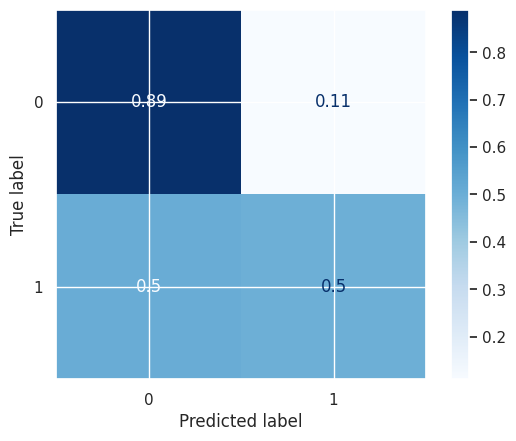

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_knn, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

KNN - Statistical analysis

<ipython-input-87-94384818443c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


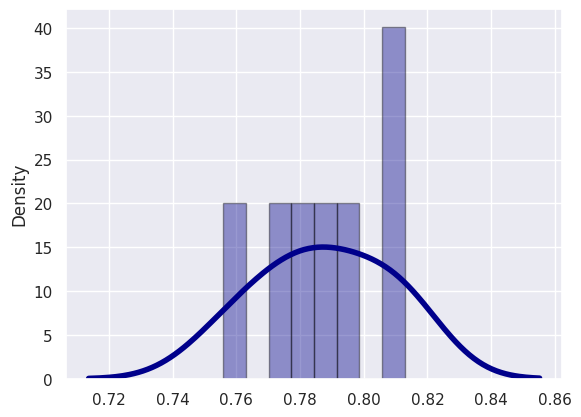

In [ ]:
hit_rates = cross_val_score(model_knn, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_knn = hit_rates

### Naive Bayes

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_nb.sav'

if run_grid_search_nb == True:
  # Create the parameter grid

  param_grid = {}

  # Create a based model
  model_nb = GaussianNB(var_smoothing = 1e-5)

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_nb, param_grid = param_grid,
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_nb = grid_search.best_estimator_
  #save
  pickle.dump(model_nb, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_nb = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_nb)
y_pred_nb = model_nb.predict(X_test)

#Fitting 10 folds for each of 800 candidates, totalling 8000 fits

Fitting 7 folds for each of 1 candidates, totalling 7 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parameters of best model:
GaussianNB(var_smoothing=1e-05)


NB - Accuracy, precision and recall

In [ ]:
y_pred = y_pred_nb
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.687708,0.786047,0.543408


NB - Confusion matrix

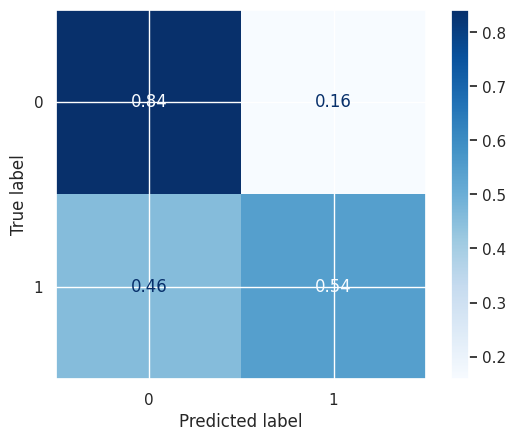

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_nb, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

NB - Statistical analysis

<ipython-input-94-ff63dc8fcf64>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


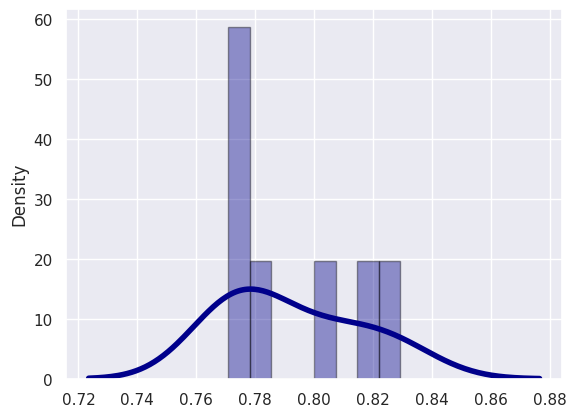

In [ ]:
hit_rates = cross_val_score(model_nb, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_nb = hit_rates

### Neural Network

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_nn.sav'

if run_grid_search_nn == True:
  # Create the parameter grid
  #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

  param_grid = {
                'learning_rate':['constant', 'invscaling', 'adaptive'],
                'solver':['lbfgs', 'sgd', 'adam'],
                'activation':['identity', 'logistic', 'tanh', 'relu'],
                'max_iter': [200,300,400],
                'alpha': [0.0001,0.0003],
                'hidden_layer_sizes':[1,2,3,4,5]
                }

  # Create a based model
  model_nn = MLPClassifier()

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_nn, param_grid = param_grid,
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_nn = grid_search.best_estimator_
  #save
  pickle.dump(model_nn, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_nn = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_nn)
y_pred_nn = model_nn.predict(X_test)

#Fitting 10 folds for each of 800 candidates, totalling 8000 fits

Parameters of best model:
MLPClassifier(activation='tanh', alpha=0.0003, hidden_layer_sizes=3,
              learning_rate='invscaling', max_iter=300)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 0.22.2.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


NN - Accuracy, precision and recall

In [ ]:
y_pred = y_pred_nn
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.742525,0.786765,0.688103


NN - Confusion matrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


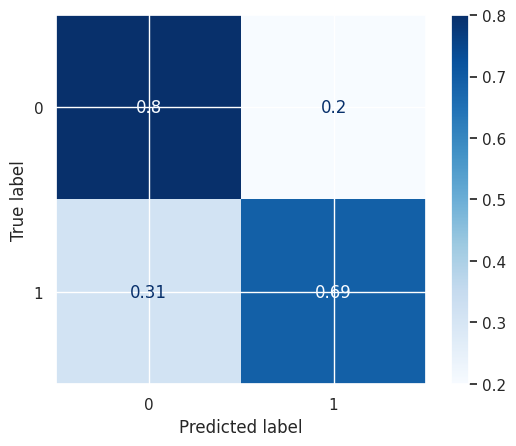

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_nn, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

NN - Statistical analysis

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

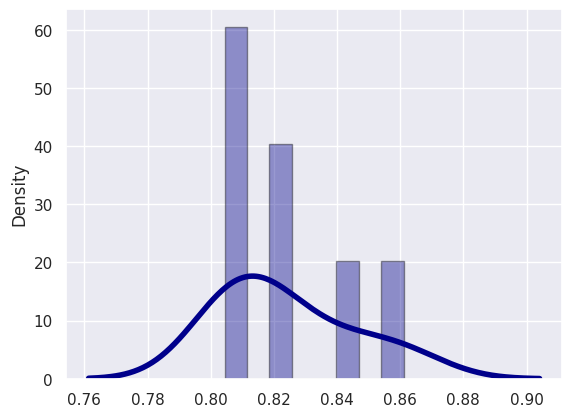

In [ ]:
hit_rates = cross_val_score(model_nn, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_nn = hit_rates

### SVM

In [ ]:
filename = '/content/drive/MyDrive/ds340/Prediction of Homicides in Urban Centers: A Machine Learning Approach/models/best_model_svm.sav'

if run_grid_search_svm == True:
  # Create the parameter grid


  param_grid = {}

  # Create a based model
  model_svm = svm.SVC(C = 10,
                      kernel = 'poly',
                      shrinking = True,
                      degree = 1)

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_svm, param_grid = param_grid,
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_svm = grid_search.best_estimator_
  #save
  pickle.dump(model_svm, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_svm = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_svm)
y_pred_svm = model_svm.predict(X_test)



Fitting 7 folds for each of 1 candidates, totalling 7 fits


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Parameters of best model:
SVC(C=10, degree=1, kernel='poly')


SVM - Accuracy, precision and recall

In [ ]:
y_pred = y_pred_svm
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.742525,0.822314,0.639871


SVM - Confusion matrix

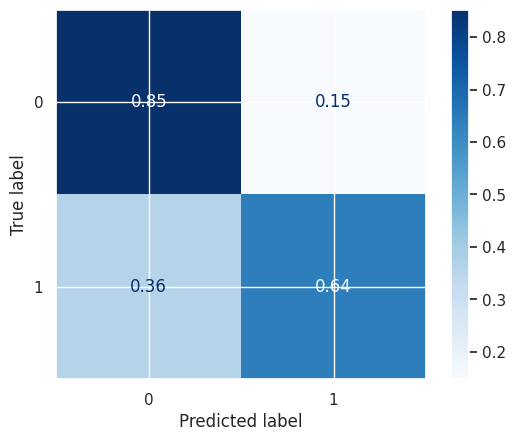

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test, display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

SVM - Statistical analysis

<ipython-input-105-e7c7c016f452>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


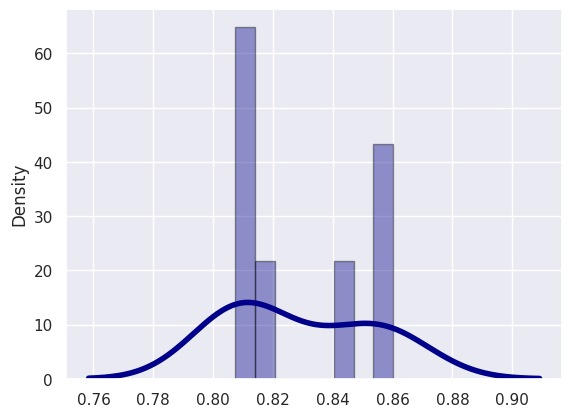

In [ ]:
hit_rates = cross_val_score(model_svm, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True,
             bins=8, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_svm = hit_rates

## - Models comparation;


Density


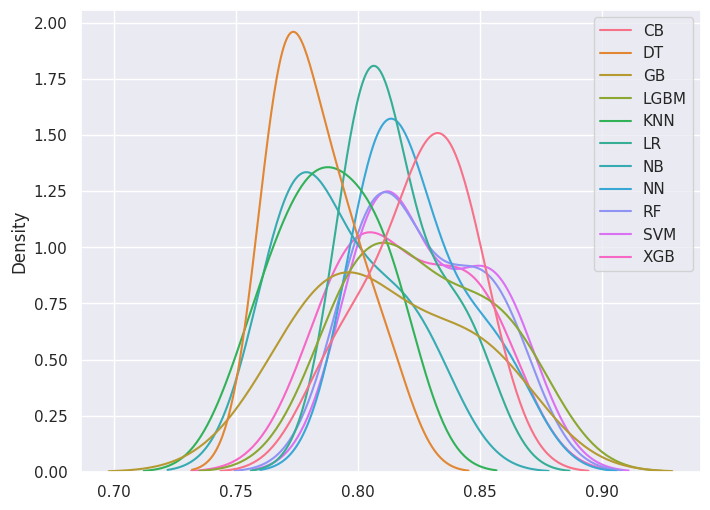

Friedman Test
FriedmanchisquareResult(statistic=37.844155844155864, pvalue=4.039677384083605e-05)


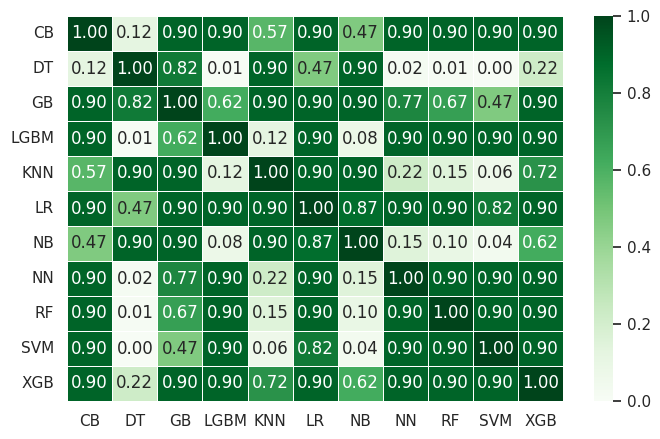

In [ ]:
print('Density')

dt_tmp = {
          'CB':hit_rates_cb,
          'DT':hit_rates_dt,
          'GB':hit_rates_gb,
          'LGBM':hit_rates_lgbm,
          'KNN':hit_rates_knn,
          'LR':hit_rates_lr,
          'NB':hit_rates_nb,
          'NN':hit_rates_nn,
          'RF':hit_rates_rf,
          'SVM':hit_rates_svm,
          'XGB':hit_rates_xgb
          }

dt_tmp = pd.DataFrame(dt_tmp)

fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=dt_tmp,legend=True,bw_method=0.7)

plt.show()

a = [hit_rates_cb.tolist(),
     hit_rates_dt.tolist(),
     hit_rates_gb.tolist(),
     hit_rates_lgbm.tolist(),
     hit_rates_knn.tolist(),
     hit_rates_lr.tolist(),
     hit_rates_nb.tolist(),
     hit_rates_nn.tolist(),
     hit_rates_rf.tolist(),
     hit_rates_svm.tolist(),
     hit_rates_xgb.tolist()]


print('Friedman Test')
print(friedmanchisquare(*a))
posthoc = sp.posthoc_nemenyi_friedman(list(map(list, zip(*a))))
models_names = ['CB','DT','GB','LGBM','KNN','LR','NB','NN','RF','SVM','XGB']
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(
    posthoc, vmin=0,
    vmax=1, xticklabels=models_names,
    yticklabels=models_names,
    cmap="Greens",linewidths=.5,
    annot=True,fmt='.2f')
#plt.savefig('matrix.png')
plt.show()

Density


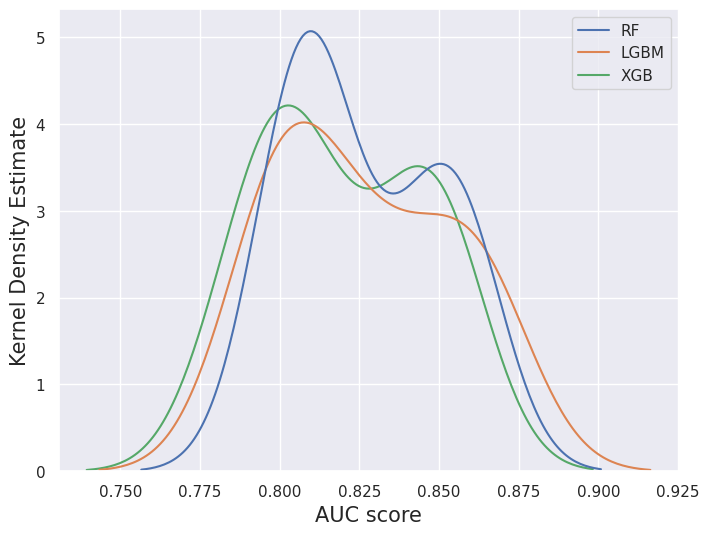

Friedman Test
FriedmanchisquareResult(statistic=37.844155844155864, pvalue=4.039677384083605e-05)


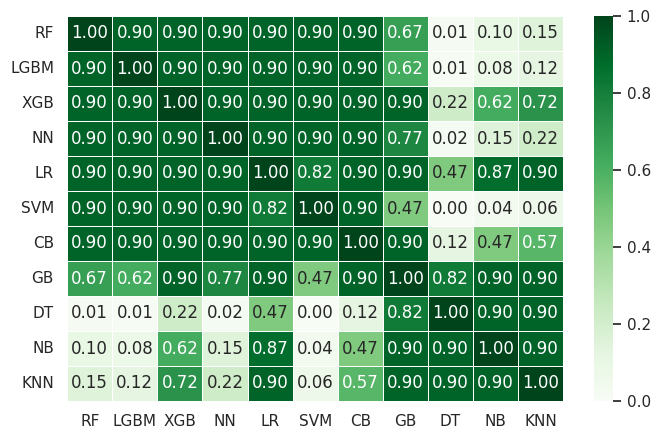

In [ ]:
print('Density')

dt_tmp = {
          'RF':hit_rates_rf,
          'LGBM':hit_rates_lgbm,
          'XGB':hit_rates_xgb
          }

dt_tmp = pd.DataFrame(dt_tmp)

fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel('AUC score', fontsize=15)
plt.ylabel('Kernel Density Estimate', fontsize=15)
sns.kdeplot(data=dt_tmp,legend=True,bw_method=0.6)

plt.show()

a = [hit_rates_rf.tolist(),
     hit_rates_lgbm.tolist(),
     hit_rates_xgb.tolist(),
     hit_rates_nn.tolist(),
     hit_rates_lr.tolist(),
     hit_rates_svm.tolist(),
     hit_rates_cb.tolist(),
     hit_rates_gb.tolist(),
     hit_rates_dt.tolist(),
     hit_rates_nb.tolist(),
     hit_rates_knn.tolist()
    ]


print('Friedman Test')
print(friedmanchisquare(*a))
posthoc = sp.posthoc_nemenyi_friedman(list(map(list, zip(*a))))
models_names = ['RF','LGBM','XGB','NN','LR','SVM','CB','GB','DT','NB','KNN']
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(
    posthoc, vmin=0,
    vmax=1, xticklabels=models_names,
    yticklabels=models_names,
    cmap="Greens",linewidths=.5,
    annot=True,fmt='.2f')
#plt.savefig('matrix.png')
plt.show()

## - Information Gain (Global);

Funções utilizadas

In [ ]:



def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


###################

###################


def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])

    ##Calculate the entropy of the dataset

    #Calculate the values and the corresponding counts for the split attribute
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)

    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain



Ganho de Informação - Ranque de atributos

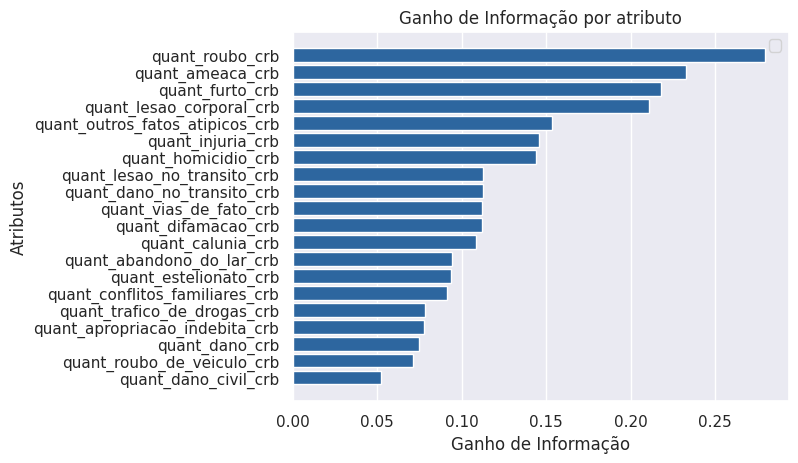

In [ ]:
#Extraindo ganho de informacao de atributos
information_gain = pd.Series([InfoGain(df,feature,y_feature_name) for feature in x_features_names], index=x_features_names).sort_values(ascending=False)

df_Pred2Town_feature_rank['info_gain_ent'] = information_gain.index[:]
att_count = 20
sns.barplot(x=information_gain[0:att_count], y=information_gain.index[0:att_count], color = (0.1, 0.4, 0.7, 0.6)) #Criando bar plot
plt.xlabel('Ganho de Informação')
plt.ylabel('Atributos')
plt.title("Ganho de Informação por atributo")
plt.legend()
plt.autoscale(enable=True, axis='both', tight=None)
plt.show()

## - Attribute importance (Global);

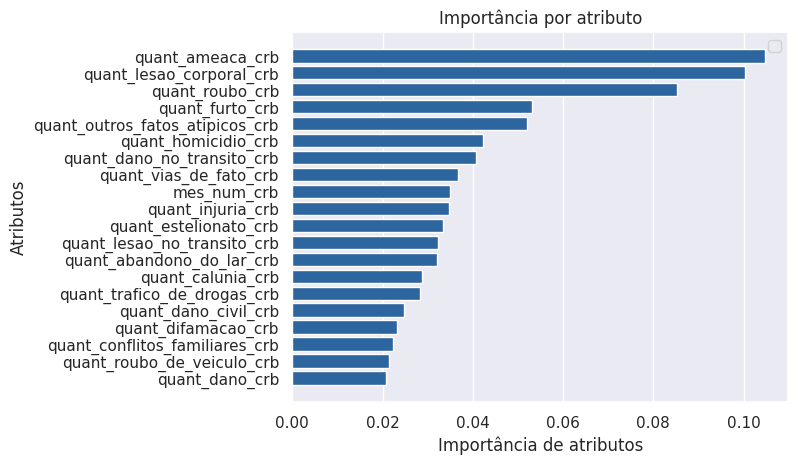

In [ ]:

#Extracting importance from attributes of the Random Forest model
feature_imp = pd.Series(model_rf.feature_importances_,index=x_features_names).sort_values(ascending=False)

df_Pred2Town_feature_rank['feat_imp_oob'] = feature_imp.index[:]

sns.barplot(x=feature_imp[0:att_count], y=feature_imp.index[0:att_count], color = (0.1, 0.4, 0.7, 0.6)) #Criando bar plot
plt.xlabel('Importância de atributos')
plt.ylabel('Atributos')
plt.title("Importância por atributo")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend()
plt.show()
